# Load Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import required libraries 

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import pickle
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Read dataset from drive
You should have the file ai4i2020 in a folder maintenance_ds

In [3]:
df = pd.read_csv('drive/MyDrive/maintenance_ds/ai4i2020.csv')

df.head()

,UDI,Product_ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm_,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# Describe data

In [4]:
df.describe()

,UDI,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm_,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


# Information about dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UDI                    10000 non-null  int64  
 1   Product_ID             10000 non-null  object 
 2   Type                   10000 non-null  object 
 3   Air_temperature_K      10000 non-null  float64
 4   Process_temperature_K  10000 non-null  float64
 5   Rotational_speed_rpm   10000 non-null  int64  
 6   Torque_Nm_             10000 non-null  float64
 7   Tool_wear_min          10000 non-null  int64  
 8   Machine_failure        10000 non-null  int64  
 9   TWF                    10000 non-null  int64  
 10  HDF                    10000 non-null  int64  
 11  PWF                    10000 non-null  int64  
 12  OSF                    10000 non-null  int64  
 13  RNF                    10000 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 1.1+ M

# Remove some columns from dataset, and create X and y dataframes

In [6]:
X = df.drop(['UDI', 'Product_ID', 'Type', 'Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
y = df['Machine_failure']
X.shape, y.shape

((10000, 5), (10000,))

# Split dataset into: train, test and validation 

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


X_train.shape, X_test.shape, y_train.shape, X_val.shape, y_val.shape

((6400, 5), (2000, 5), (6400,), (1600, 5), (1600,))

# Train KNeighborsClassifier 
accuracy is: 97.65% on test data
and        : 98.06% on validation data

In [8]:
knn_model = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn_model.fit(X_train, y_train)
print(knn_model.score(X_test, y_test))
y_val_pred = knn_model.predict(X_val)
print(accuracy_score(y_val, y_val_pred))

0.9765
0.980625


# Train RandomForestClassifier 
accuracy is: 98.1% on test data
and        : 98.43% on validation data

In [11]:
rdf_model =  make_pipeline(StandardScaler(), RandomForestClassifier())
rdf_model.fit(X_train, y_train)
y_pred = rdf_model.predict(X_test)

# save the model
filename = 'rdf_model.sav'
pickle.dump(rdf_model, open(filename, 'wb'))

y_val_pred = rdf_model.predict(X_val)
accuracy_score(y_pred, y_test), accuracy_score(y_val_pred, y_val)


(0.9815, 0.985)


# Train SVM Classifier 
accuracy is: 97.6% on test data
and        : 97.8% on validation data

In [12]:
cvc_model =  make_pipeline(StandardScaler(), SVC())
cvc_model.fit(X_train, y_train)
y_pred = cvc_model.predict(X_test)

y_val_pred = cvc_model.predict(X_val)
accuracy_score(y_pred, y_test), accuracy_score(y_val_pred, y_val)

(0.9765, 0.978125)

# Train a deep learning model

In [14]:
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
import tensorflow as tf

# Initialize the model
model = tf.keras.Sequential()

# Add layers to the model
model.add(tf.keras.layers.Dense(10, activation='relu', input_shape=(5,)))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
loss_v, accuracy_v = model.evaluate(X_val, y_val)
print("Accuracy:", accuracy, "Accuracy Val:", accuracy_v)

Epoch 1/150
200/200 [==============================] - 3s 2ms/step - loss: 0.3330 - accuracy: 0.9627
Epoch 2/150
200/200 [==============================] - 0s 2ms/step - loss: 0.1765 - accuracy: 0.9638
Epoch 3/150
200/200 [==============================] - 0s 2ms/step - loss: 0.1511 - accuracy: 0.9638
Epoch 4/150
200/200 [==============================] - 0s 2ms/step - loss: 0.1346 - accuracy: 0.9638
Epoch 5/150
200/200 [==============================] - 0s 2ms/step - loss: 0.1219 - accuracy: 0.9638
Epoch 6/150
200/200 [==============================] - 0s 2ms/step - loss: 0.1135 - accuracy: 0.9638
Epoch 7/150
200/200 [==============================] - 0s 2ms/step - loss: 0.1078 - accuracy: 0.9638
Epoch 8/150
200/200 [==============================] - 0s 2ms/step - loss: 0.1038 - accuracy: 0.9650
Epoch 9/150
200/200 [==============================] - 0s 2ms/step - loss: 0.1014 - accuracy: 0.9673
Epoch 10/150
200/200 [==============================] - 0s 2ms/step - loss: 0.0991 - accura

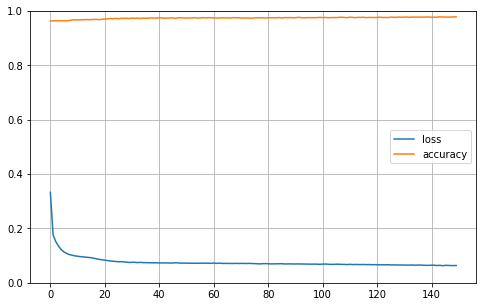

In [17]:
df = pd.DataFrame(history.history)
df.head()

df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()